In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [3]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

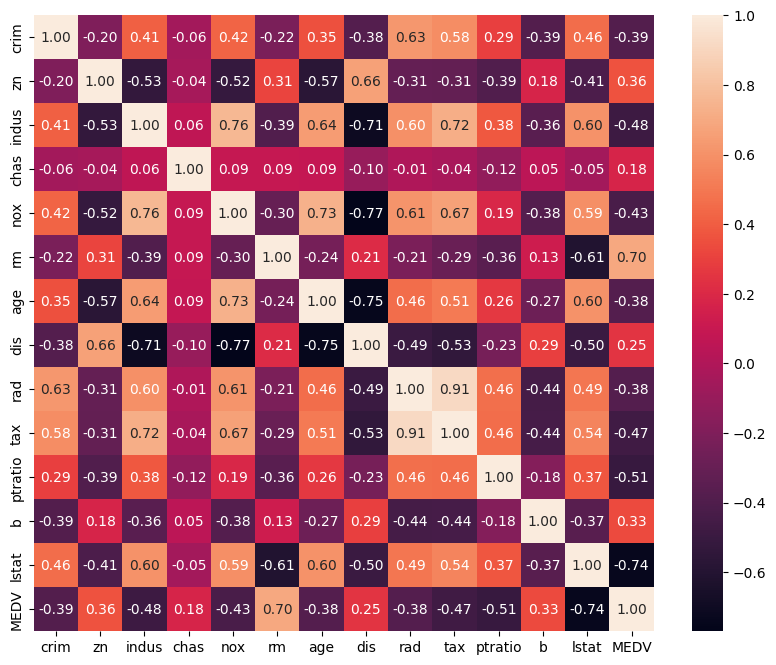

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [8]:
corr_with_medv = corr_matrix['MEDV'].sort_values(ascending=False)
print(corr_with_medv)

MEDV       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: MEDV, dtype: float64


In [12]:
selected_features = ['rm', 'ptratio', 'lstat']
x = df[selected_features]
y = df['MEDV']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

coef_rm, coef_ptratio, coef_lstat = model.coef_
print("Coef of RM: ", coef_rm)
print("Coef of PTRATIO: ", coef_ptratio)
print("Coef of LSTAT: ", coef_lstat)

print("Intercept: ", model.intercept_)

MSE:  27.114957415580566
MAE:  3.3325380783240957
R2:  0.6302528487272829
Coef of RM:  4.933118359418631
Coef of PTRATIO:  -0.8670947546233064
Coef of LSTAT:  -0.567125882738385
Intercept:  14.588099261571124


In [20]:
mean_ptratio = df['ptratio'].mean()
mean_lstat = df['lstat'].mean()
rm_values = np.linspace(x_test['rm'].min(), x_test['rm'].max(), 100)
x_line = np.column_stack((rm_values, np.full_like(rm_values, mean_ptratio), np.full_like(rm_values, mean_lstat)))
pred_medv = model.predict(x_line)

C:\Users\Vedanshoo Kadam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


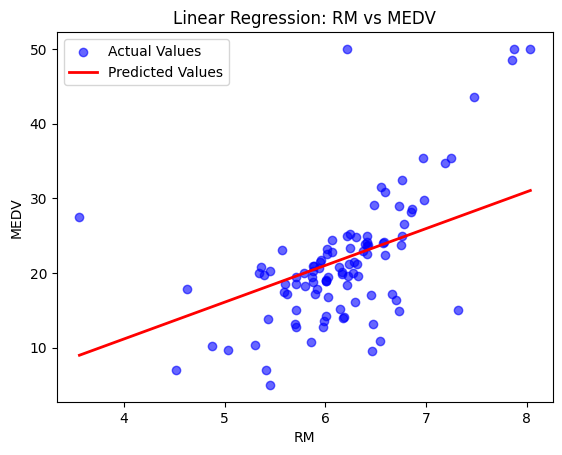

In [23]:
plt.scatter(x_test['rm'], y_test, color='blue', alpha=0.6, label="Actual Values")
plt.plot(rm_values, pred_medv, color='red', linewidth=2, label="Predicted Values")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Linear Regression: RM vs MEDV")
plt.legend()
plt.show()

In [24]:
df['price'] = model.predict(df[selected_features])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.932516
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.645835
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.312751
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.228040
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.607643


In [27]:
cmp_df = pd.DataFrame({
    'Original Values': df['MEDV'],
    'Predicted Values': df['price']
})
cmp_df.head()

,Original Values,Predicted Values
0,24.0,30.932516
1,21.6,25.645835
2,34.7,32.312751
3,33.4,31.228040
4,36.2,30.607643


In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_scaled = scaler.transform(y_test.to_numpy().reshape(-1,1))

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(3,), name='Input-Layer-1'),
    tf.keras.layers.Dense(100, name='Hidden-Layer-2'),
    tf.keras.layers.BatchNormalization(name='Hidden-Layer-3'),
    tf.keras.layers.Dense(50, name='Hidden-Layer-4'),
    tf.keras.layers.Dense(1, name='Output-Layer-5'),
])

In [39]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-2 (Dense)               │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer-5 (Dense)               │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,901 (23.05 KB)

 Trainable params: 5,701 (22.27 KB)

 Non-trainable params: 200 (800.00 B)

In [41]:
history = model.fit(x_train_scaled, y_train_scaled, batch_size=32, epochs=20, validation_data=(x_test_scaled, y_test_scaled))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.5357 - mae: 0.8489 - val_loss: 0.5788 - val_mae: 0.5262
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5216 - mae: 0.5006 - val_loss: 0.4823 - val_mae: 0.4771
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4137 - mae: 0.4797 - val_loss: 0.5400 - val_mae: 0.5051
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3284 - mae: 0.3963 - val_loss: 0.4557 - val_mae: 0.4570
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3564 - mae: 0.4233 - val_loss: 0.5048 - val_mae: 0.4935
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3418 - mae: 0.4208 - val_loss: 0.4875 - val_mae: 0.4815
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3294 - mae: 0.4162 - val_loss: 0.4289 - val_mae: 0.4381
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3548 - mae: 0.4541 - val_loss: 0.4315 - val_mae: 0.4511
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4275 - mae:

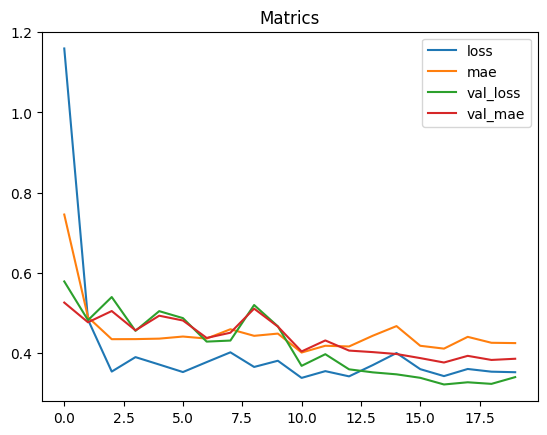

In [45]:
pd.DataFrame(history.history).plot()
plt.title("Matrics")
plt.show()

In [46]:
y_pred_dnn = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [47]:
print("MSE: ", mean_squared_error(y_test_scaled, y_pred_dnn))
print("MAE: ", mean_absolute_error(y_test_scaled, y_pred_dnn))
print("R2: ", r2_score(y_test_scaled, y_pred_dnn))

MSE:  0.34041203387335045
MAE:  0.386204810274127
R2:  0.5967376724091025


In [58]:
y_test_original = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_original = scaler.inverse_transform(y_pred_dnn.reshape(-1, 1)).flatten()

In [59]:
dnn_cmp_df = pd.DataFrame({
    'Original': y_test_original,
    'Predicted': y_pred_original
})
dnn_cmp_df.head()

,Original,Predicted
0,23.6,25.395060
1,32.4,27.990595
2,13.6,18.298128
3,22.8,24.277851
4,16.1,19.425877
